# Assignment

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving house_prices.csv to house_prices.csv


In [ ]:
df = pd.read_csv('house_prices.csv')

In [ ]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

# 1.&nbsp; Count of one categorical feature

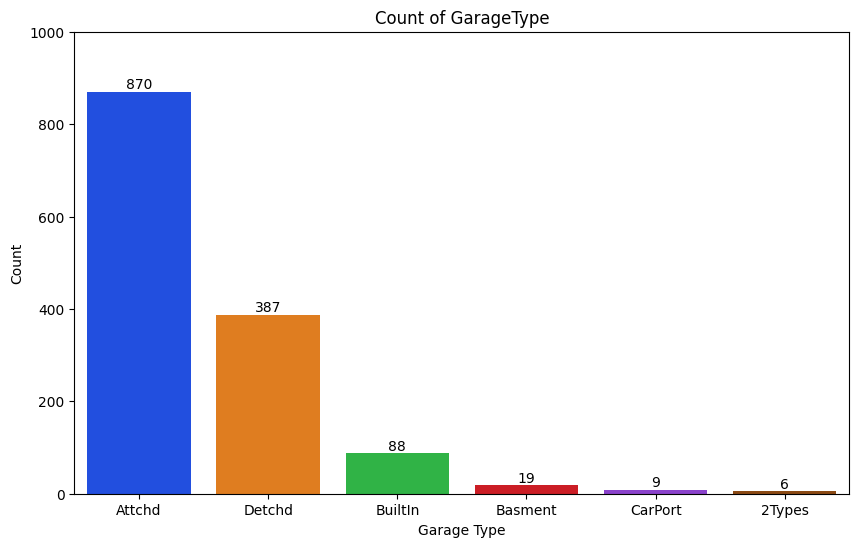

In [ ]:
#Menghitung frekuensi setiap kategori dalam kolom 'GarageType'
garage_type_counts = df['GarageType'].value_counts()

#Memvisualisasikan count dari 'GarageType' menggunakan bar plot
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(
    x=garage_type_counts.index,
    y=garage_type_counts.values,
    hue=garage_type_counts.index,
    palette='bright',
    legend=False)

#Menambahkan label nilai⁸ pada tiap bar
for index, value in enumerate(garage_type_counts.values):
    bar_plot.text(
        index,
        value + 0.1,
        str(value),
        ha='center',
        va='bottom')

#Menyesuaikan limit sumbu y
bar_plot.set_ylim(0, 1000)

plt.title('Count of GarageType')
plt.xlabel('Garage Type')
plt.ylabel('Count')
plt.show()

The 'Attchd' (Attached) garage type predominates, exhibiting a significantly higher frequency than other types. This suggests that the majority of houses in the dataset feature garages directly connected to the house. This preference for attached garages is likely driven by the convenience and accessibility they offer, contributing to easier access and enhanced security for homeowners.

# 2.&nbsp; Distribution of one continuous feature

Summary Statistics:
count    1460.000000
mean     1515.463699
std       525.480383
min       334.000000
25%      1129.500000
50%      1464.000000
75%      1776.750000
max      5642.000000
Name: GrLivArea, dtype: float64


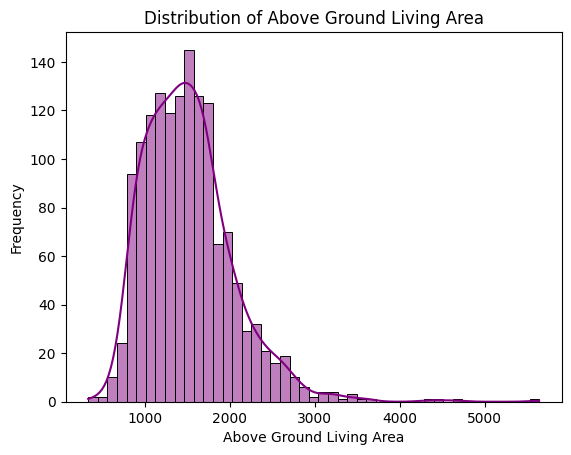

In [ ]:
#Memvisualisasikan GrLivArea dengan histogram
fig, ax = plt.subplots()
sns.histplot(df['GrLivArea'], kde=True,color='purple')
ax.set(
    xlabel="Above Ground Living Area",
    ylabel="Frequency",
    title="Distribution of Above Ground Living Area"
)

#Summary statistics
summary_stats = df['GrLivArea'].describe()
print("Summary Statistics:")
print(summary_stats);


The mean above-grade (ground) living area (GrLivArea) for properties in this dataset is approximately 1515.46 square feet, with the majority falling within the range of 1129.5 to 1776.75 square feet. However, there are outliers with significantly larger areas, reaching a maximum of 5642 square feet. These variations likely stem from diverse architectural designs, lot sizes, and potential renovations, contributing to the broader spectrum of living spaces observed in the dataset.

# 3.&nbsp; Categorical-continuous

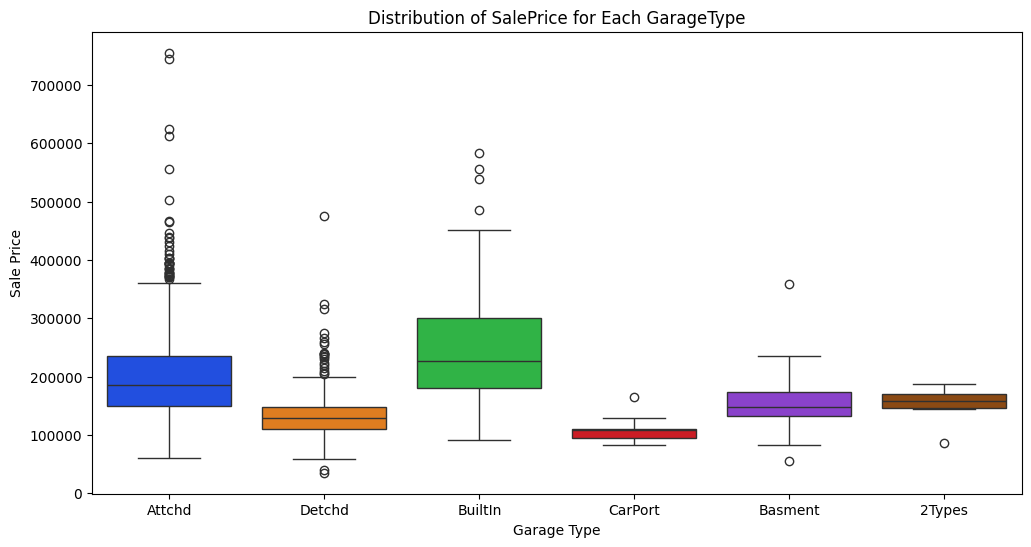


Summary Statistics of Total SalePrice:
            count           mean    median    min     max        sum
GarageType                                                          
2Types          6  151283.333333  159000.0  87000  186700     907700
Attchd        870  202892.656322  185000.0  60000  755000  176516611
Basment        19  160570.684211  148000.0  55993  359100    3050843
BuiltIn        88  254751.738636  227500.0  91000  582933   22418153
CarPort         9  109962.111111  108000.0  82000  164900     989659
Detchd        387  134091.162791  129500.0  35311  475000   51893280


In [ ]:
#Memvisualisasikan distribusi SalePrice untuk setiap GarageType
plt.figure(figsize=(12, 6))
sns.boxplot(x='GarageType',
            y='SalePrice',
            data=df, hue='GarageType',
            palette='bright',
            legend=False)

plt.title('Distribution of SalePrice for Each GarageType')
plt.xlabel('Garage Type')
plt.ylabel('Sale Price')

plt.show()

#Summary Statistics
summary_stats = df.groupby('GarageType')['SalePrice'].agg(['count', 'mean', 'median', 'min', 'max', 'sum'])
print("\nSummary Statistics of Total SalePrice:")
print(summary_stats)


The boxplot data shows that houses with \'BuiltIn' garages have the highest average sale price, around \$254,751, while those with 'CarPort' garages have the lowest average sale price, about $109,962. Houses with an inside garage (BuiltIn) are more expensive because they usually have extra space and interior improvements, making them more valuable and comfortable, which drives up the selling price.

# 4.&nbsp; Continuous-continuous

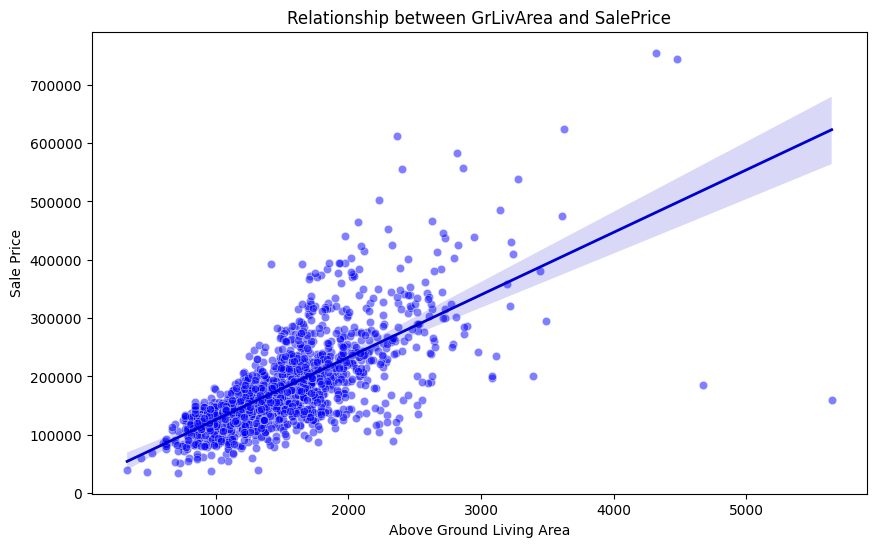


Summary Statistics:
         GrLivArea      SalePrice
count  1460.000000    1460.000000
mean   1515.463699  180921.195890
std     525.480383   79442.502883
min     334.000000   34900.000000
25%    1129.500000  129975.000000
50%    1464.000000  163000.000000
75%    1776.750000  214000.000000
max    5642.000000  755000.000000


In [ ]:
#Memvisualisasikan hubungan antara GrLivArea dan SalePrice
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='GrLivArea',
    y='SalePrice',
    data=df, color='blue',
    alpha=0.5)

sns.regplot(
    x='GrLivArea',
    y='SalePrice',
    data=df,
    scatter=False,
    color='mediumblue',
    line_kws={'linewidth': 2})

plt.title('Relationship between GrLivArea and SalePrice')
plt.xlabel('Above Ground Living Area')
plt.ylabel('Sale Price')

plt.show()

#Summary statistics
summary_stats = df[['GrLivArea', 'SalePrice']].describe()
print("\nSummary Statistics:")
print(summary_stats)

The positive correlation between GrLivArea and SalePrice suggests that larger living areas tend to fetch higher prices in the real estate market. This aligns with the common perception that larger living spaces offer more comfort, functionality, and desirability, leading to increased demand and subsequently higher sale prices. Additionally, larger living areas often imply more spacious and luxurious accommodations, which can contribute to their higher valuation.